<a href="https://colab.research.google.com/github/Sahil-Singh2002/SVM/blob/main/SVM_section1%262%263.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

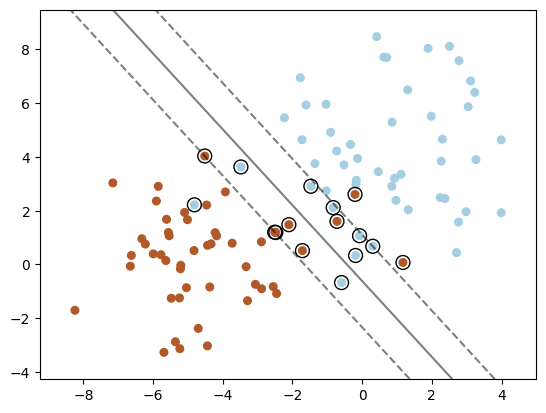

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Import the pandas library

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create 40 separable points
X, y = make_blobs(n_samples=100, centers=2, cluster_std= 2, random_state=3)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=10)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()



--- Linearly Separable Dataset ---


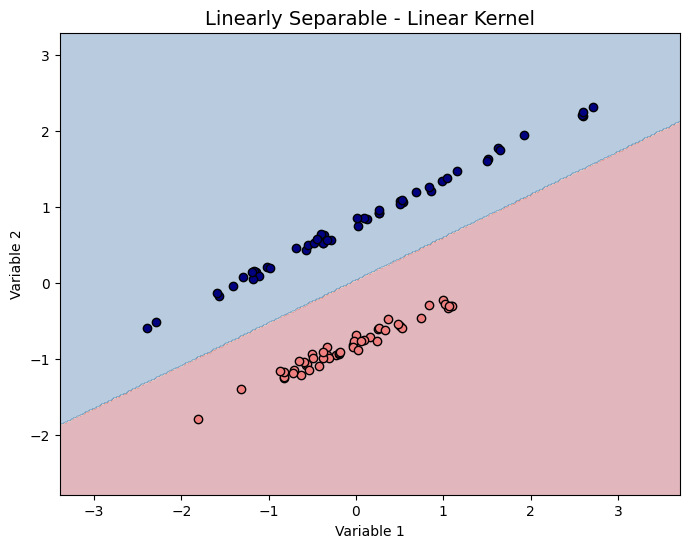

--- Moons Dataset ---


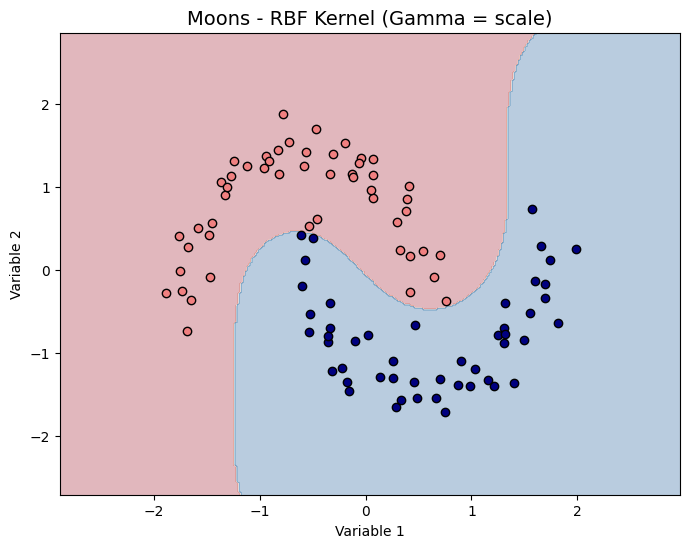

--- Circles Dataset ---


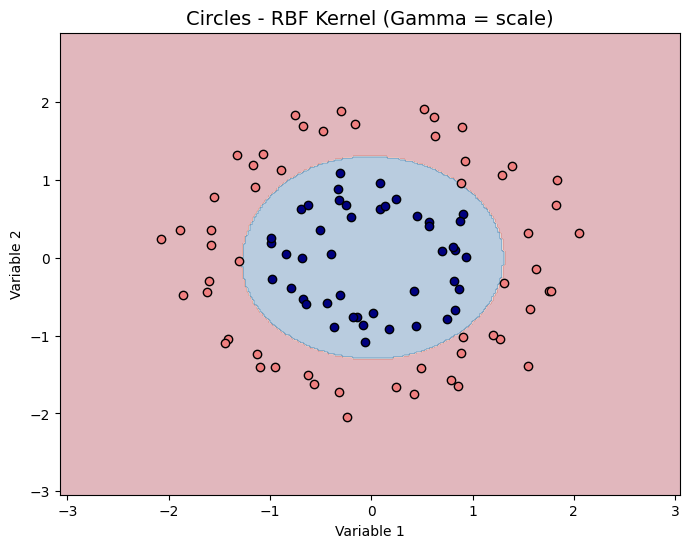

--- Sigmoid Blobs Dataset ---


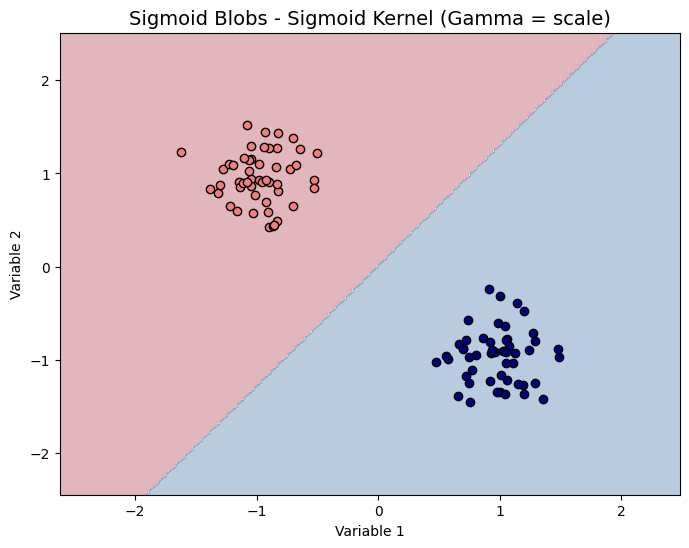

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons, make_circles, make_blobs
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Function to plot decision boundaries with blue and light red colors for data points
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    # Create a meshgrid to plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Predict on the data points to determine their regions
    y_pred = model.predict(X)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')  # Red-Blue colormap for decision regions

    # Plot the data points with custom colors
    for i in range(len(y)):
        if y_pred[i] == 0:
            plt.scatter(X[i, 0], X[i, 1], color='lightcoral', edgecolor='k')  # Light red for points on the red side
        else:
            plt.scatter(X[i, 0], X[i, 1], color='navy', edgecolor='k')  # Blue for points on the blue side

    # Add title
    plt.title(title, fontsize=14)
    plt.xlabel("Variable 1")
    plt.ylabel("Variable 2")
    plt.show()

# Create and scale datasets tailored to each kernel
datasets = {
    # Suitable for Linear Kernel: Linearly Separable Data
    "Linearly Separable": make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42),

    # Suitable for Polynomial Kernel: Slightly Curved Boundaries
    "Moons": make_moons(n_samples=100, noise=0.1, random_state=42),

    # Suitable for RBF Kernel: Concentric Circles (Complex Non-Linear Boundaries)
    "Circles": make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=42),

    # Suitable for Sigmoid Kernel: Threshold-Based Patterns
    "Sigmoid Blobs": make_blobs(n_samples=100, centers=2, cluster_std=1, random_state=42)
}

# Kernel types to compare with optimal parameters
kernels = {
    "Linear": {"kernel": "linear"},
    # Kernel for Moons dataset
    "RBF": {"kernel": "rbf", "gamma": "scale"},
    "Sigmoid": {"kernel": "sigmoid", "gamma": "scale"}
}

# Mapping datasets to the most suitable kernels
dataset_kernel_mapping = {
    "Linearly Separable": "Linear",
    "Moons": "RBF",
    "Circles": "RBF",
    "Sigmoid Blobs": "Sigmoid"
}

# Train and plot SVM with the most suitable kernel for each dataset
for dataset_name, (X, y) in datasets.items():
    print(f"--- {dataset_name} Dataset ---")
    # Scale the data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Get the optimal kernel for the dataset
    optimal_kernel_name = dataset_kernel_mapping[dataset_name]
    kernel_params = kernels[optimal_kernel_name]

    # Create SVM model with the optimal kernel
    model = SVC(**kernel_params)
    model.fit(X, y)

    # Create a title with kernel name and optimal parameters
    title = f"{dataset_name} - {optimal_kernel_name} Kernel"
    if optimal_kernel_name in ["RBF", "Sigmoid"]:
        title += f" (Gamma = {kernel_params.get('gamma', 'scale')})"

    # Plot decision boundary with the title
    plot_decision_boundary(X, y, model, title)


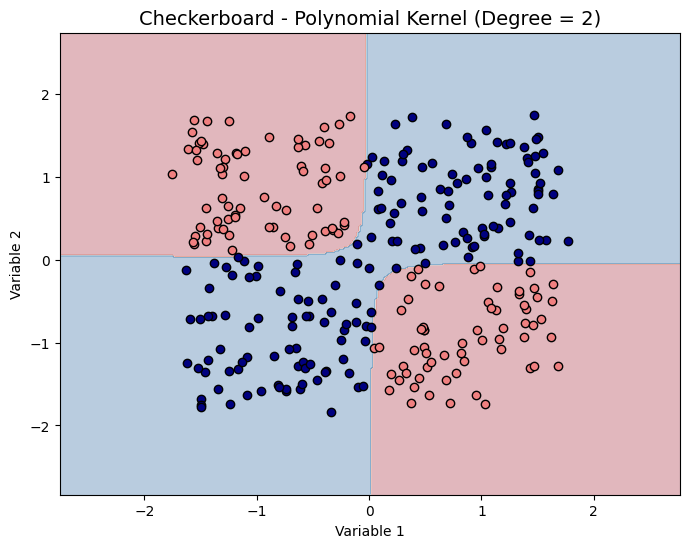

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Function to plot decision boundaries with blue and light red colors for data points
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    # Create a meshgrid to plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Predict on the data points to determine their regions
    y_pred = model.predict(X)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')  # Red-Blue colormap for decision regions

    # Plot the data points with custom colors
    for i in range(len(y)):
        if y_pred[i] == 0:
            plt.scatter(X[i, 0], X[i, 1], color='lightcoral', edgecolor='k')  # Light red for points on the red side
        else:
            plt.scatter(X[i, 0], X[i, 1], color='navy', edgecolor='k')  # Blue for points on the blue side

    # Add title
    plt.title(title, fontsize=14)
    plt.xlabel("Variable 1")
    plt.ylabel("Variable 2")
    plt.show()

# Generate a Checkerboard-like dataset
def make_checkerboard(n_samples=300, noise=0.1):
    np.random.seed(42)
    X = np.random.rand(n_samples, 2) * 4 - 2  # Random points in [-2, 2] range
    y = ((X[:, 0] * X[:, 1]) > 0).astype(int)  # Checkerboard pattern
    X += np.random.normal(scale=noise, size=X.shape)  # Add noise
    return X, y

# Create the dataset
X, y = make_checkerboard(n_samples=300, noise=0.1)

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train SVM with Polynomial Kernel
model = SVC(kernel='poly', degree=2)
model.fit(X, y)

# Plot the decision boundary
plot_decision_boundary(X, y, model, "Checkerboard - Polynomial Kernel (Degree = 2)")


Best parameters: {'coef0': -1.0, 'gamma': 0.23111111111111113}


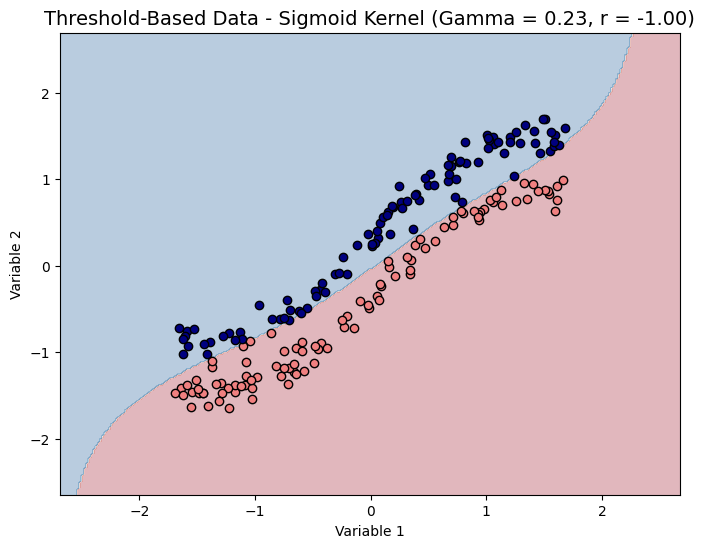

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Function to generate threshold-based dataset
def make_threshold_data(n_samples=200, noise=0.1):
    np.random.seed(42)
    n_samples_per_class = n_samples // 2

    # First class (left side)
    x1 = np.random.uniform(-2, 2, size=(n_samples_per_class, 1))
    y1 = np.tanh(x1) + np.random.normal(scale=noise, size=(n_samples_per_class, 1))
    class_1 = np.hstack([x1, y1])
    y_class_1 = np.zeros(n_samples_per_class)

    # Second class (right side, offset)
    x2 = np.random.uniform(-2, 2, size=(n_samples_per_class, 1))
    y2 = np.tanh(x2) + 0.5 + np.random.normal(scale=noise, size=(n_samples_per_class, 1))
    class_2 = np.hstack([x2, y2])
    y_class_2 = np.ones(n_samples_per_class)

    # Combine both classes
    X = np.vstack([class_1, class_2])
    y = np.hstack([y_class_1, y_class_2])

    return X, y

# Function to plot decision boundaries with custom data point colors
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    # Create a meshgrid to plot decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Predict on the data points to determine their regions
    y_pred = model.predict(X)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')  # Red-Blue colormap for decision regions

    # Plot the data points with custom colors
    for i in range(len(y)):
        if y_pred[i] == 0:
            plt.scatter(X[i, 0], X[i, 1], color='lightcoral', edgecolor='k')  # Light red for points on the red side
        else:
            plt.scatter(X[i, 0], X[i, 1], color='navy', edgecolor='k')  # Blue for points on the blue side

    # Add title and labels
    plt.title(title, fontsize=14)
    plt.xlabel("Variable 1")
    plt.ylabel("Variable 2")
    plt.show()

# Generate and scale the dataset
X, y = make_threshold_data(n_samples=200, noise=0.1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define parameter grid
param_grid = {
    'gamma': np.linspace(0.01, 2, 10),
    'coef0': np.linspace(-1, 2, 10)
}

# Perform Grid Search
model = SVC(kernel='sigmoid')
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X, y)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Generate and scale the dataset again
X, y = make_threshold_data(n_samples=200, noise=0.1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train SVM with Sigmoid Kernel using the best parameters found
best_gamma = grid_search.best_params_['gamma']
best_coef0 = grid_search.best_params_['coef0']
model = SVC(kernel='sigmoid', gamma=best_gamma, coef0=best_coef0)
model.fit(X, y)

# Plot the decision boundary
plot_decision_boundary(X, y, model, f"Threshold-Based Data - Sigmoid Kernel (Gamma = {best_gamma:.2f}, r = {best_coef0:.2f})")
